In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
%%time
data = fetch_20newsgroups(subset='all', categories=['comp.graphics', 'sci.med'])

CPU times: user 281 ms, sys: 58.9 ms, total: 340 ms
Wall time: 348 ms


In [3]:
data['target_names']

['comp.graphics', 'sci.med']

In [4]:
texts = data['data']
target = data['target']

In [5]:
texts[0]

'From: dyer@spdcc.com (Steve Dyer)\nSubject: Re: Analgesics with Diuretics\nOrganization: S.P. Dyer Computer Consulting, Cambridge MA\n\nIn article <ofk=lve00WB2AvUktO@andrew.cmu.edu> Lawrence Curcio <lc2b+@andrew.cmu.edu> writes:\n>I sometimes see OTC preparations for muscle aches/back aches that\n>combine aspirin with a diuretic.\n\nYou certainly do not see OTC preparations advertised as such.\nThe only such ridiculous concoctions are nostrums for premenstrual\nsyndrome, ostensibly to treat headache and "bloating" simultaneously.\nThey\'re worthless.\n\n>The idea seems to be to reduce\n>inflammation by getting rid of fluid. Does this actually work? \n\nThat\'s not the idea, and no, they don\'t work.\n\n-- \nSteve Dyer\ndyer@ursa-major.spdcc.com aka {ima,harvard,rayssd,linus,m2c}!spdcc!dyer\n'

In [6]:
data['target_names'][target[0]]

'sci.med'

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(encoding='utf8', min_df=1)
vectorizer.fit(texts)

CountVectorizer(encoding='utf8')

In [8]:
vectorizer.transform(texts[:1])

<1x32548 sparse matrix of type '<class 'numpy.int64'>'
	with 86 stored elements in Compressed Sparse Row format>

In [9]:
print(vectorizer.transform(texts[:1]).indices)
print(vectorizer.transform(texts[:1]).data)

[ 3905  3983  4143  4345  4665  4701  4712  5074  5176  5198  5242  5619
  5870  6348  6984  7232  7630  8267  8451  8460  8682  8733  8916  9557
 10811 10812 10901 10933 10971 11312 11488 13133 13226 13463 13866 14726
 14806 15682 15805 15952 16147 18002 18031 18373 18740 18781 18790 18936
 20420 21036 21164 21166 21494 21518 21622 21769 21839 21856 23589 23602
 24556 24592 24803 25502 25513 26464 26474 27021 27398 27518 27940 28199
 28286 28687 29187 29189 29264 29300 29500 29837 30702 31915 32005 32052
 32095 32392]
[2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 6 2 1 2 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 1 1 3 2 1 2 1
 2 3 2 1 3 1 1 2 2 1 1 1]


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(encoding='utf8', min_df=1)
vectorizer.fit(texts)

TfidfVectorizer(encoding='utf8')

In [11]:
vectorizer.transform(texts[:1])

<1x32548 sparse matrix of type '<class 'numpy.float64'>'
	with 86 stored elements in Compressed Sparse Row format>

In [12]:
print(vectorizer.transform(texts[:1]).indices)
print(vectorizer.transform(texts[:1]).data)

[32392 32095 32052 32005 31915 30702 29837 29500 29300 29264 29189 29187
 28687 28286 28199 27940 27518 27398 27021 26474 26464 25513 25502 24803
 24592 24556 23602 23589 21856 21839 21769 21622 21518 21494 21166 21164
 21036 20420 18936 18790 18781 18740 18373 18031 18002 16147 15952 15805
 15682 14806 14726 13866 13463 13226 13133 11488 11312 10971 10933 10901
 10812 10811  9557  8916  8733  8682  8460  8451  8267  7630  7232  6984
  6348  5870  5619  5242  5198  5176  5074  4712  4701  4665  4345  4143
  3983  3905]
[0.02775776 0.030364   0.10357777 0.10097852 0.05551552 0.08913878
 0.0751644  0.05521512 0.02543534 0.07527191 0.05440145 0.04646966
 0.07125018 0.0955189  0.01649287 0.12280349 0.25018259 0.0710195
 0.09802838 0.05646637 0.09712269 0.10057076 0.09482619 0.08113136
 0.04893556 0.09057384 0.23738007 0.11869004 0.18429156 0.12343474
 0.01703927 0.04332515 0.12343474 0.01848065 0.05632337 0.12343474
 0.03769659 0.0854585  0.06358581 0.07172143 0.09057384 0.12343474
 0.0833

In [13]:
import nltk
stemmer = nltk.stem.snowball.RussianStemmer()

In [15]:
print(stemmer.stem('машинное'), stemmer.stem('машинный'))

машин машин


In [14]:
print(stemmer.stem('машинное'), stemmer.stem('обучение'))

машин обучен


In [16]:
stemmer = nltk.stem.snowball.EnglishStemmer()

def stem_text(text, stemmer):
    tokens = text.split()
    return ' '.join(map(lambda w: stemmer.stem(w), tokens))

stemmed_texts = []
for t in tqdm(texts[:1000]):
    stemmed_texts.append(stem_text(t, stemmer))

100%|██████████| 1000/1000 [00:03<00:00, 271.21it/s]


In [17]:
print(texts[0])

From: dyer@spdcc.com (Steve Dyer)
Subject: Re: Analgesics with Diuretics
Organization: S.P. Dyer Computer Consulting, Cambridge MA

In article <ofk=lve00WB2AvUktO@andrew.cmu.edu> Lawrence Curcio <lc2b+@andrew.cmu.edu> writes:
>I sometimes see OTC preparations for muscle aches/back aches that
>combine aspirin with a diuretic.

You certainly do not see OTC preparations advertised as such.
The only such ridiculous concoctions are nostrums for premenstrual
syndrome, ostensibly to treat headache and "bloating" simultaneously.
They're worthless.

>The idea seems to be to reduce
>inflammation by getting rid of fluid. Does this actually work? 

That's not the idea, and no, they don't work.

-- 
Steve Dyer
dyer@ursa-major.spdcc.com aka {ima,harvard,rayssd,linus,m2c}!spdcc!dyer



In [18]:
print(stemmed_texts[0])

from: dyer@spdcc.com (steve dyer) subject: re: analges with diuret organization: s.p. dyer comput consulting, cambridg ma in articl <ofk=lve00wb2avukto@andrew.cmu.edu> lawrenc curcio <lc2b+@andrew.cmu.edu> writes: >i sometim see otc prepar for muscl aches/back ach that >combin aspirin with a diuretic. you certain do not see otc prepar advertis as such. the onli such ridicul concoct are nostrum for premenstru syndrome, ostens to treat headach and "bloating" simultaneously. they'r worthless. >the idea seem to be to reduc >inflamm by get rid of fluid. doe this actual work? that not the idea, and no, they don't work. -- steve dyer dyer@ursa-major.spdcc.com aka {ima,harvard,rayssd,linus,m2c}!spdcc!dy


In [19]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [22]:
morph.parse('машинное')[0]

Parse(word='машинное', tag=OpencorporaTag('ADJF,Qual neut,sing,nomn'), normal_form='машинный', score=0.5, methods_stack=((DictionaryAnalyzer(), 'машинное', 12, 14),))

In [35]:
morph.parse('машинные')#[0]

[Parse(word='машинные', tag=OpencorporaTag('ADJF,Qual plur,nomn'), normal_form='машинный', score=0.5, methods_stack=((DictionaryAnalyzer(), 'машинные', 12, 20),)),
 Parse(word='машинные', tag=OpencorporaTag('ADJF,Qual inan,plur,accs'), normal_form='машинный', score=0.5, methods_stack=((DictionaryAnalyzer(), 'машинные', 12, 24),))]

In [37]:
morph.parse('стали специалистом')#[1]

[Parse(word='стали специалистом', tag=OpencorporaTag('NOUN,anim,masc sing,ablt'), normal_form='стали специалист', score=0.5754001684919966, methods_stack=((FakeDictionary(), 'стали специалистом', 52, 4), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'истом'))),
 Parse(word='стали специалистом', tag=OpencorporaTag('ADJF,Qual masc,sing,loct'), normal_form='стали специалистый', score=0.21229991575400167, methods_stack=((FakeDictionary(), 'стали специалистом', 4, 6), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'истом'))),
 Parse(word='стали специалистом', tag=OpencorporaTag('ADJF,Qual neut,sing,loct'), normal_form='стали специалистый', score=0.21229991575400167, methods_stack=((FakeDictionary(), 'стали специалистом', 4, 19), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'истом')))]

In [33]:
morph.parse('сплав стали')

[Parse(word='сплав стали', tag=OpencorporaTag('VERB,impf,intr plur,past,indc'), normal_form='сплав стать', score=0.39999999999999997, methods_stack=((FakeDictionary(), 'сплав стали', 15, 10), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'стали'))),
 Parse(word='сплав стали', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Orgn sing,gent'), normal_form='сплав сталь', score=0.19999999999999998, methods_stack=((FakeDictionary(), 'сплав стали', 107, 1), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'стали'))),
 Parse(word='сплав стали', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Orgn sing,datv'), normal_form='сплав сталь', score=0.19999999999999998, methods_stack=((FakeDictionary(), 'сплав стали', 107, 2), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'стали'))),
 Parse(word='сплав стали', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Orgn sing,loct'), normal_form='сплав сталь', score=0.19999999999999998, methods_stack=((FakeDictionary(), 'сплав стали', 1

Сравним работу стеммера и лемматизатора на примере:

In [27]:
stemmer = nltk.stem.snowball.RussianStemmer()
print(stemmer.stem('машинное'))

машин


In [28]:
print(morph.parse('машинное')[0].normal_form)

машинный


In [31]:
print(morph.parse('машинная')[0].normal_form)

машинный


In [29]:
print(stemmer.stem('машина'))

машин


In [30]:
print(morph.parse('машина')[0].normal_form)

машина


In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/manthanpatel98/House-Price-Prediction/master/train.csv')

In [44]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
data = data.drop(columns=["Id"])
y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

In [ ]:
data.head()

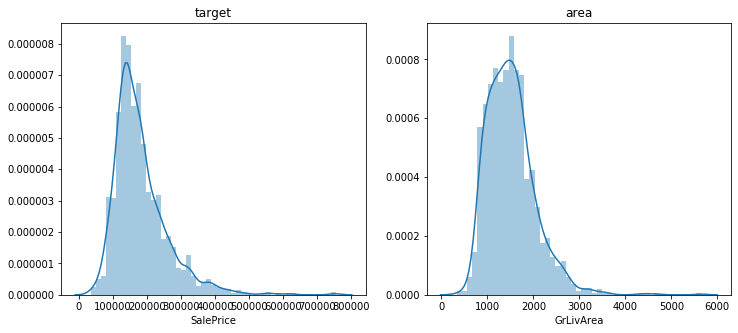

In [48]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(y, label='target')
plt.title('target')

plt.subplot(1, 2, 2)
sns.distplot(data.GrLivArea, label='area')
plt.title('area')
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)[numeric_features]
X_test = X_test.fillna(numeric_data_mean)[numeric_features]

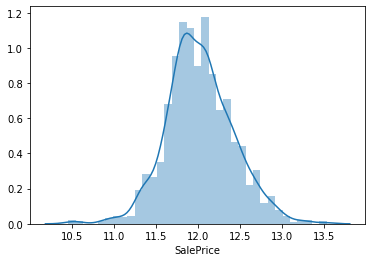

In [50]:
sns.distplot(np.log(y+1), label='target')
plt.show()

In [51]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE = 32085.7681


In [52]:
model = Ridge()
model.fit(X_train, np.log(y_train+1))
y_pred = np.exp(model.predict(X_test))-1

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE = 26649.2742


In [53]:
X_train['GrLivArea'] = np.log(X_train['GrLivArea'] + 1)
X_test['GrLivArea'] = np.log(X_test['GrLivArea'] + 1)

In [54]:
model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE = 31893.8891


In [55]:
model = Ridge()
model.fit(X_train[numeric_features], np.log(y_train+1))
y_pred = np.exp(model.predict(X_test[numeric_features]))-1

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE = 25935.0780


In [56]:
from sklearn.linear_model import LinearRegression

np.random.seed(36)
X = np.random.uniform(0, 1, size=100)
y = np.cos(1.5 * np.pi * X) + np.random.normal(scale=0.1, size=X.shape)

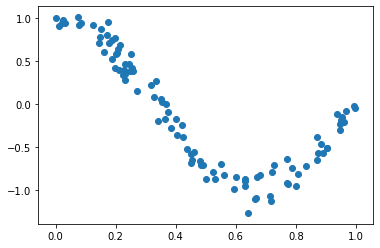

In [57]:
plt.scatter(X, y)

In [58]:
X = X.reshape((-1, 1))
thresholds = np.arange(0.2, 1.1, 0.2).reshape((1, -1))

X_expand = np.hstack((
    X,
    ((X > thresholds[:, :-1]) & (X <= thresholds[:, 1:])).astype(int)))

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [60]:
-np.mean(cross_val_score(
    LinearRegression(), X, y, cv=KFold(n_splits=3),
    scoring='neg_mean_squared_error'))

0.20553980048560808

In [61]:
-np.mean(cross_val_score(
    LinearRegression(), X_expand, y, cv=KFold(n_splits=3),
    scoring='neg_mean_squared_error'))

0.05580385745900119